# NumPy数组与list的区别
- numpy独立于其他python内置对象。list保存一组值也可以当做数组使用，但列表的元素可以是任何对象，因此列表中所保存的是对象的指针，对于数值运算来说比较浪费内存和CPU计算时间。
- numpy可在整个数组上执行复杂计算，而无需for循环。

In [6]:
import numpy as np

my_arr = np.arange(1000000)
my_list = list(range(1000000))

%time for _ in range(10): my_arr2 = my_arr * 2
%time for _ in range(10): my_list2 = [x * 2 for x in my_list]

Wall time: 41 ms
Wall time: 1.99 s


# ndarray对象 (N-dimensional array)
- 创建：
    - array（效率不高）：np.array([####])或np.array((####))
    - arange（根据步长创建一维数组，不包括end）：np.arange(start, end, step)
    - linspace（根据元素个数创建一维数组，包括end）：np.linspace(start, end, number)
    - logspace（根据元素个数创建一维数组，等比，start和end均是log10后的值）：np.logspace(start, end, number)
    - fromstring(string, dtype=**)
    - fromfunction（第一个参数为计算数组元素的函数，第二个参数为数据大小）：fromfunction(function, shape)
    - 特殊数组
        - 全0数组：np.zeros(shape)
        - 全1数组：np.ones(shape)
        - empty数组（一个没有任何具体值的数组）：np.empty(shape)
- 属性：
    - 维度：arr.ndim
    - 大小：arr.shape
        - shape是一个元组
        - 一维：(3,)；二维：(3, 2)；三维：(2, 3, 4)——第三维，行，列？
    - 元素类型：arr.dtype
        - 修改元素类型：arr.astype(np.float)
        - 指定元素类型
    - 元素个数：arr.size
- 操作：
    - 多维数组的降维：
        - 对于3D数组a，a[..., 0]表示第三维上的第一层
    - 变形：
        - arr.shape = m, n：直接修改属性shape，原数组被改变
        - arr_new = arr.reshape(m, n)：创建一个变形后的新数组，原数组shape不变；但2个数组共享数据存储内存区域，元素修改会在2个数组中同时发生。
    - 创建时指定元素类型：arr = np.array([], dtype=np.float/complex)
    - 修改元素类型：arr_2 = arr.astype(np.float)——astype总会创建一个新的数组
    - 存取元素：
        - 使用下标范围：索引、切片等类似列表操作；不同之处在于：通过下标范围获取的新数组与原始数组共享数据空间
            - 新数组叫做原数组的视图，若想得到副本而非视图，则用arr[2:4].copy;
            - 二维数组的索引：
                - arr[2]：第三行
                - arr[0, 2]（等价于arr[0][2]）：第一行第三列
        - 使用整数序列：将整数序列中的每个元素作为下标，整数序列可以是列表或数组；使用整数序列获得的数组不和原始数组共享数据空间。
        - 使用布尔数组：将收集原始数组中对应布尔数组中Ture下标的元素；使用布尔数组获得的数组不和原始数组共享数据空间;一般是使用布尔运算的ufunc函数产生。
    - 数组转置：arr.T/arr.transpose((3个轴编号))或arr.swapaxes(2个轴编号)
        - 返回的是原数组的视图
        - 二维数组转置：arr.transpose((1, 0 ))或简写为arr.T
        - 高维数组转置需要提供一个由轴编号组成的数组：arr.transpose((0, 1, 2))数组不变，arr.transpose((1, 0, 2))将0轴与1轴交换
        - 2个轴交换：arr.swapaxes(1, 2)
    - 计算内积：np.dot(arr.T, arr)
- 结构数组
    - 先定义my_type = np.dtype({})，再arr = np.array([], dtype=my_type)
    - 结构中每个元素的大小必须固定，因此需指定
    - 结构元素与数组共享内存数据
    - 结构像字典一样可以通过字符串下标获取其对应的字段值

In [20]:
## 数组创建
import numpy as np

# array
# 一维
a = np.array([1, 2, 3, 4])
b = np.array((5, 6, 7, 8))
# 多维
c = np.array([[1, 2, 3, 4], [4, 5, 6, 7], [7, 8, 9, 0]])

print(a)
print(b)
print(c)
print('**********\n')

#布尔数组
boo = np.array([False, True, True])
boo_2 =np.array([0, 1, 1], dtype=np.bool)
print(boo)
print(boo_2)
print('**********\n')

# arange
a_2 = np.arange(0, 1, 0.1, dtype=np.complex)
print(a_2)
print('**********\n')

# linspace
a_3 = np.linspace(0, 1, 10)
print(a_3)
print('**********\n')

# logspace
a_4 =np.logspace(0, 1, 10)
print(a_4)
print('**********\n')

# fromstring
s = 'abcdefgh'
a_5 = np.fromstring(s, dtype=np.int8)
a_6 = np.fromstring(s, dtype=np.int16)
a_7 = np.fromstring(s, dtype=np.float)
print(a_5)
print(a_6)
print(a_7)
print('**********\n')

# fromfunction
def func(i, j):
    "九九乘法表"
    
    return (i+1) * (j+1)

a_8 = np.fromfunction(func, (9,9))
print(a_8)
print('**********\n')

# 特殊数组
# 全0数组
t_1 = np.zeros(5)
t_2 = np.zeros((2, 3))
print(t_1)
print(t_2, '\n')

# 全1数组
t_3 = np.ones((2, 3))
print(t_3, '\n')
t_33 = np.ones_like(a)
print(t_33, '\n')

# empty数组：创建一个没有任何具体值的数组
t_4 = np.empty((2, 3))
print(t_4, '\n')

# identity：对角线为1，其余为0的方阵
# eye：对角线为1，其余为0的M*N矩阵，而且可控制对角线位置
t_5 = np.eye(4)
print(t_5, '\n')
print(np.eye(3, 4, 0), '\n')
print(np.eye(3, 4, 1), '\n')

t_6 = np.identity(4)
print(t_6, '\n')

[1 2 3 4]
[5 6 7 8]
[[1 2 3 4]
 [4 5 6 7]
 [7 8 9 0]]
**********

[False  True  True]
[False  True  True]
**********

[0. +0.j 0.1+0.j 0.2+0.j 0.3+0.j 0.4+0.j 0.5+0.j 0.6+0.j 0.7+0.j 0.8+0.j
 0.9+0.j]
**********

[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]
**********

[ 1.          1.29154967  1.66810054  2.15443469  2.7825594   3.59381366
  4.64158883  5.9948425   7.74263683 10.        ]
**********

[ 97  98  99 100 101 102 103 104]
[25185 25699 26213 26727]
[8.54088322e+194]
**********

[[ 1.  2.  3.  4.  5.  6.  7.  8.  9.]
 [ 2.  4.  6.  8. 10. 12. 14. 16. 18.]
 [ 3.  6.  9. 12. 15. 18. 21. 24. 27.]
 [ 4.  8. 12. 16. 20. 24. 28. 32. 36.]
 [ 5. 10. 15. 20. 25. 30. 35. 40. 45.]
 [ 6. 12. 18. 24. 30. 36. 42. 48. 54.]
 [ 7. 14. 21. 28. 35. 42. 49. 56. 63.]
 [ 8. 16. 24. 32. 40. 48. 56. 64. 72.]
 [ 9. 18. 27. 36. 45. 54. 63. 72. 81.]]
**********

[0. 0. 0. 0. 0.]
[[0. 0. 0.]
 [0. 0. 0.]] 

[[1. 1. 1.]
 [1. 1. 1.]] 

[1

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
D:\anaconda3\lib\site-packages\ipykernel_launcher.py:41: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
D:\anaconda3\lib\site-packages\ipykernel_launcher.py:42: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


In [29]:
## 数组属性
# (1)维度
print(a.ndim)

# (2)大小
print(a.shape)
print(c.shape)
print('**********\n')

# 变形
#①直接修改属性shape，原数组被改变
c.shape = 4,3
print(c)
print('**********\n')

c.shape = 2,-1   #-1表示自动计算此轴长度
print(c)
print('**********\n')

#②reshape()，创建一个变形后的新数组，原数组shape不变，但2个数组共享数据存储内存区域，
#因此修改其中任意一个数组的元素都会同时修改另一个数组。
d = a.reshape((2, 2))
print(d)
print(a)
a[1] = 100
print(d)
print(a)
print('**********\n')

#(3)元素类型
print(c.dtype)

#指定元素类型
e = np.array([[1, 2, 3, 4], [4, 5, 6, 7], [7, 8, 9, 0]], dtype=np.float)
print(e)
print(e.dtype, '\n')

#修改元素类型
e_2 = e.astype(np.int)
print(e_2.dtype)

1
(4,)
(3, 4)
**********

[[1 2 3]
 [4 4 5]
 [6 7 7]
 [8 9 0]]
**********

[[1 2 3 4 4 5]
 [6 7 7 8 9 0]]
**********

[[1 2]
 [3 4]]
[1 2 3 4]
[[  1 100]
 [  3   4]]
[  1 100   3   4]
**********

int32
[[1. 2. 3. 4.]
 [4. 5. 6. 7.]
 [7. 8. 9. 0.]]
float64 

int32


In [35]:
## 存取元素
#（1）下标范围
arr = np.arange(10)
print(arr)

print(arr[5])
print(arr[-1])
print(arr[1:4])
print(arr[:4])
print(arr[2:-2])
print(arr[::2])
print('***********\n')

arr_2 = arr[2:6]
print(arr_2)
arr_2[1] = 20
print(arr_2)
print(arr)   # 共享数据存储空间
print('*************\n')

#（2）整数序列
x = np.arange(10, 1, -1)
print(x)

print(x[[3, 3, 1, 8]])

x_2 = x[np.array([3, 3, -1, 5])]
print(x_2)
x_2[1] = 20
print(x_2)
print(x)   #不共享数据存储空间
print('***************\n')

#（3）布尔数组
y = np.arange(5,0,-1)
print(y)

print(y[np.array([True, False, True, False, False])])
print(y[[True, False, True, False, False]])

names = np.array(['bob', 'john', 'joe', 'bob'])
data = np.random.randn(4, 3)
print(data[names == 'bob'])

#修改元素
#y[np.array([True, False, True])] = 50, 30
#print(y)

#布尔运算
z = np.random.rand(10)
print(z)

print(z>0.5)

print(z[z>0.5])

[0 1 2 3 4 5 6 7 8 9]
5
9
[1 2 3]
[0 1 2 3]
[2 3 4 5 6 7]
[0 2 4 6 8]
***********

[2 3 4 5]
[ 2 20  4  5]
[ 0  1  2 20  4  5  6  7  8  9]
*************

[10  9  8  7  6  5  4  3  2]
[7 7 9 2]
[7 7 2 5]
[ 7 20  2  5]
[10  9  8  7  6  5  4  3  2]
***************

[5 4 3 2 1]
[5 3]
[5 3]
[0.04945885 0.58523447 0.2250996  0.13256795 0.66604824 0.9896034
 0.10560521 0.06258133 0.34162573 0.27835719]
[False  True False False  True  True False False False False]
[0.58523447 0.66604824 0.9896034 ]


In [44]:
## 多维数组
# 创建
m = np.array([[1, 2, 3, 4], [5, 6, 7, 9]])
print(m)
print('\n')

m_1 = np.arange(0, 60, 10).reshape(-1, 1) + np.arange(6)
print(m_1)
print('*********************\n')

#存取
print(m_1[(0,1,2,3,4,),(1,2,3,4,5)], '\n')   #（）表示某个元素位置
print(m_1[3:,[1,2,5]], '\n')    #[]表示某个子矩阵范围

mask = np.array([1,0,0,0,0,1], dtype=np.bool)
print(m_1[mask,2], '\n')

[[1 2 3 4]
 [5 6 7 9]]


[[ 0  1  2  3  4  5]
 [10 11 12 13 14 15]
 [20 21 22 23 24 25]
 [30 31 32 33 34 35]
 [40 41 42 43 44 45]
 [50 51 52 53 54 55]]
*********************

[ 1 12 23 34 45] 

[[31 32 35]
 [41 42 45]
 [51 52 55]] 

[ 2 52]


In [5]:
## 数组转置
import numpy as np
#（1）二维数组
a = np.array([[1, 2, 3], [4, 5, 6]])
b = a.T
print(b, '\n')
b[1] = 0
print(b, '\n')
print(a, '\n')  #共享数据存储空间

print(a.transpose((1, 0 )))
print('***************\n')

#（2）三维数组
arrN3 = np.array([[[1, 2, 3], [4, 5, 6]], [[-1, -2, -3], [-4, -5, -6]]])
print(arrN3, '\n')
print(arrN3.transpose((1, 0, 2)), '\n')
print(arrN3.transpose((0, 2, 1)), '\n')

#2个轴交换
print(arrN3.swapaxes(0, 1), '\n')

[[1 4]
 [2 5]
 [3 6]] 

[[1 4]
 [0 0]
 [3 6]] 

[[1 0 3]
 [4 0 6]] 

[[1 4]
 [0 0]
 [3 6]]
***************

[[[ 1  2  3]
  [ 4  5  6]]

 [[-1 -2 -3]
  [-4 -5 -6]]] 

[[[ 1  2  3]
  [-1 -2 -3]]

 [[ 4  5  6]
  [-4 -5 -6]]] 

[[[ 1  4]
  [ 2  5]
  [ 3  6]]

 [[-1 -4]
  [-2 -5]
  [-3 -6]]] 

[[[ 1  2  3]
  [-1 -2 -3]]

 [[ 4  5  6]
  [-4 -5 -6]]] 



In [51]:
## 结构数组
# 定义一个结构数组，它的每个元素都有name, age, weight字段。
# 先创建一个dtype对象，通过字典参数描述结构类型的各个字段。字典有2个关键字：names，formats。
# names定义结构中的每个字段名，而formats定义每个字段的类型。

# S32：32个字节的字符串类型；
# i：32bit的整数类型，相当于np.int32；
# f：32bit的单精度浮点数类型，相当于np.float32.
import numpy as np

persontype = np.dtype({
    'names': ['name', 'age', 'weight'],
    'formats': ['S32', 'i', 'f']
})

J = np.array([('Zhang', 32, 75), ('Wang', 24, 55)], dtype=persontype)
print(J)

print(J[0].dtype, '\n')

# 结构元素与数组共享内存
JJ = J[1]
print(JJ)
JJ['name'] = 'Li'
print(J[1]['name'], '\n')

JJJ = J['age']
print(JJJ)
JJJ[0] = 44
print(J[0]['age'])

[(b'Zhang', 32, 75.) (b'Wang', 24, 55.)]
[('name', 'S32'), ('age', '<i4'), ('weight', '<f4')] 

(b'Wang', 24, 55.)
b'Li' 

[32 24]
44


# ufunc运算（universal function）
- 作用：一种能对数组的每个元素进行操作的函数
## 将条件逻辑表述为数组运算
- 函数numpy.where(condition, x, y)是三元表达式x if condition else y的矢量化版本；
- np.where()中的第二、三个参数可以是数组，也可以是标量。
## 数学和统计方法
- sum、mean、std、cumsum累加、cumprod累积等；
- 对于所有元素的操作：arr.sum()或np.sum(arr)；
- 对于某一轴元素的操作：arr.sum(轴编号)或arr.sum(axis=轴编号)。
## 用于布尔数组的方法
- sum常被用来对布尔数组中的True值计数；
- any用于测试数组中是否存在一个或多个True；
- all用于检查数组中所有值是否都为True
## 排序
- 对于所有元素的排序（对于高维，默认axis=1）：np.sort(arr)
- 对于高维数组的某一轴元素的排序：np.sort(arr, 轴编号)或np.sort(arr, axis=轴编号)
## 数组的集合运算
- np.unique(arr)：找出数组中不同的元素并返回排序后的结果（类似于python内置中sorted(set(arr))）；
- np.in1d(x,y)：测试一个数组x中的值在另一个数组y中的成员资格，并返回一个布尔数组；
- np.intersect1d(x,y)：x,y的交集并返回有序结果；
- np.union1d(x,y)：x,y的并集并返回有序结果；
- np.setdiff1d(x,y)：x-y差集；
- np.setxor(x,y)：除交集的其他元素。
## 文件读写
- 文件存取格式分为2类：二进制和文本。而二进制格式文件又分为numpy专用的格式化二进制类型（内置二进制格式）和无格式类型。
- 内置二进制格式：
    - 保存：
        - 单个文件，扩展名为.npy：np.save('my_array', arr)
        - 多个文件保存到一个文件中，扩展名为.npz：np.savez('my_arrays.npz', a=arr1, b=arr2)
        - 压缩文件保存：np.savez_compressed('arrays.npz', a=arr1, b=arr2)
    - 载入：
        - np.load('**.npy')
        - arch = np.load('**.npz'); arch['b']
- 无格式二进制
    - 保存：arr.tofile('my_array.bin')
    - 读取：b = np.fromfile('my_array.bin', dtype=arr.dtype) b.shape = a.shape
    - tofile输出的数据没有格式，因此用np.fromfile读回来的时候需要自己格式化数据（设置dtype/shape）
- 使用np.savetxt和np.loadtxt可以读写一维和二维数组：
    - 保存：np.savetxt('my_array.txt', arr, fmt=数据格式, delimiter="分隔符号")——fmt/delimiter分别以'%.18e’格式和空格分隔缺省
    - 读取：np.loadtxt('my_array.txt')
- 文件对象
    - 保存：>>>f = file("my_file.npy", "wb") >>>np.save(f, a)将a保存进文件对象f中
    - 读取：>>>f = file("my_file.npy", "wr") >>>np.load(f)    
## 线性代数
- 矩阵乘法：
    - np.dot(x,y)或x.dot(y)
    - 中辍运算符@：x @ y
    - 计算x与其转置x.T的点积：x.T.dot(x)
- numpy.linalg中有一组标准的矩阵分解运算及求逆矩阵、行列式等
    - from numpy.linalg import inv, qr  >>>inv(arr)  >>>q, r = qr(arr)
- diag: 以一维数组的形式返回方阵的对角线（或非对角线）元素，或将一维数组转换为方阵（非对角线元素为0）
- trace: 计算对角线元素的和
- det: 计算矩阵行列式
- eig: 计算方阵的本征值和本征向量
- inv: 计算方阵的逆
- pinv: 计算矩阵的Moore-Penrose伪逆
- qr: 计算QR分解
- svd: 计算奇异值分解
- solve: 解线性方程组Ax=b,其中A为一个方阵
- lstsq: 计算Ax=b的最小二乘解
## 伪随机数生成（numpy.random模块）
- 伪随机数，因为它们是通过算法基于随机数生成器种子，在确定性的条件下生成的；可以用np.random.seed更改随机数生成种子；
- 一次能产生多个样本值，而python内置random模块一次只能生产一个样本值，比python内置random模块运算速度快很多；
- seed(num): 用于指定随机数生成时所用算法开始的整数值。若使用相同的num，则每次生成的随机数都相同；若不设置这个值，则系统根据时间自己选择；设置的num仅一次有效。
- numpy.random的数据生成函数使用了全局的随机种子。要避免全局状态，可以使用np.random.RandomState，创建一个与其它隔离的随机数生成器。
- permutation: 返回一个序列的随机排列或返回一个随机排列的范围
- shuffle: 对一个序列就地随机排列
- rand(2, 3): 产生[0,1)中均匀分布的样本值
- random((2, 3)): 产生[0,1)中均匀分布的样本值 （与rand功能一样，只是参数传递不同）
- uniform(start, end, size=shape): 产生在[start,end)中均匀分布的样本值
- randn(2, 3): 产生正态（平均值0，标准差1）分布的样本值
- randint(start, end, size=shape): 从给定的[start,end)范围内随机选取整数
- normal(均值,标准差,size=shape): 产生指定均值和标准差的正态（高斯）分布的样本值；若不提供size，且均值与标准差为标量，则产生一个服从该分布的随机数。标准正态分布：normal(size)
- binomial(试验次数, 试验成功概率, size): 产生二项分布的样本值
- choice(arr, size, replace=True, p)：若arr为数组，则从arr中选取元素；若arr为单个int数，则从range(arr)中选取元素。replace=True表示选取的元素会重复出；p为数组，存放选到每个数的概率。
## 广播broadcasting
- ufunc函数要求2个数组有相同的shape；若shape不同，则进行广播处理。
- 让所有输入数组都向其中shape最长的数组看齐，shape中不足的部分都通过在前面加1补齐；
- 输出数组的shape是输入数组shape各个轴上的最大值；
- 如果输入数组的某个轴和输出数组的对应轴的长度相同或其长度为1时，这个数组能够用来计算，否则出错；
- 当输入数组的某个轴的长度为1时，沿着此轴运算时都用此轴上的第一组值。
- ogrid对象：像一个多维数组，用切片组员作为下标进行存取，返回的是一组可以用来广播计算的数组。
    - np.ogrid[start:end:step]
    - np.ogrid[start:end:numj]
## 其他方法
- ufunc函数本身还有一些方法，只对2个输入1个输出的ufunc函数有效，其它ufunc对象调用这些方法时会出现ValueError异常。
- 方法reduce：沿着axis轴对数组进行操作，相当于将运算符插入到沿axis轴的所有子数组会元素中
    - np.add.reduce(arr, axis=)
- 方法accumulate：与方法reduce类似返回的数组与输入数组的shape相同，保存所有的中间计算结果（类似cumsum）
    - np.add.accumulate(arr, axis=)
- 方法outer：类似广播
    - np.add.outer(arr1, arr2)

In [16]:
import numpy as np

a = np.random.rand(2, 3)
print(a, '\n')

a2 = np.random.uniform(1, 10, (2, 3))
print(a2, '\n')

a3 = np.random.randn(2, 3)
print(a3, '\n')

a4 = np.random.randint(1, 10, (2, 3))
print(a4, '\n')

a5 = np.random.normal(0, 1, (3,))
print(a5, '\n')

a6 = np.random.normal((2, 3))
print(a6, '\n')

a7 = np.random.choice(5, 4)
print(a7, '\n')

a8 = np.random.choice(a7, 2, replace=False, p=[0.3, 0.3, 0.1, 0.3])
print(a8, '\n')

[[0.62528369 0.05632099 0.83874319]
 [0.94540895 0.80978995 0.31896072]] 

[[4.09007295 5.60131728 4.99153072]
 [5.52684561 6.60853843 1.86665105]] 

[[ 1.02948287 -0.01055977  1.00793002]
 [ 0.02952223 -0.04966749  0.53836571]] 

[[9 9 7]
 [9 9 7]] 

[2.29592733 0.89632757 0.25840812] 

[1.46085349 3.07417577] 

[2 1 1 3] 

[2 3] 



In [36]:
import numpy as np

a = np.random.randn(5)
b = np.random.randn(5)
print(a, '\n')
print(b, '\n')
print(a + b, '\n')
print(np.add(a, b), '\n')
print(sum(a), '\n')

[ 0.07024402 -1.3023498  -0.45887534 -0.19838136  1.86919041] 

[ 0.35919009  0.16349016 -1.43889862  0.26294447 -1.20668096] 

[ 0.42943411 -1.13885964 -1.89777396  0.06456311  0.66250945] 

[ 0.42943411 -1.13885964 -1.89777396  0.06456311  0.66250945] 

-0.020172070162525424 



[0 1 2 3 4] 

[-1.   -2.25 -3.5  -4.75 -6.  ] 

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]] 

[[-1.   -1.   -1.   -1.   -1.  ]
 [-2.25 -2.25 -2.25 -2.25 -2.25]
 [-3.5  -3.5  -3.5  -3.5  -3.5 ]
 [-4.75 -4.75 -4.75 -4.75 -4.75]
 [-6.   -6.   -6.   -6.   -6.  ]] 

[[1.         1.41421356 2.23606798 3.16227766 4.12310563]
 [2.25       2.46221445 3.01039864 3.75       4.58938994]
 [3.5        3.64005494 4.03112887 4.60977223 5.31507291]
 [4.75       4.85412196 5.15388203 5.61805126 6.20987117]
 [6.         6.08276253 6.32455532 6.70820393 7.21110255]] 



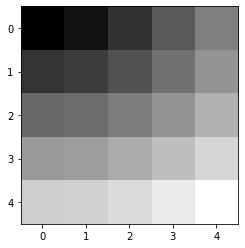

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

a = np.arange(5)
b = np.linspace(-1, -6, 5)
print(a, '\n')
print(b, '\n')
c, d = np.meshgrid(a, b)
print(c, '\n')
print(d, '\n')

z = np.sqrt(c ** 2 + d ** 2)
print(z, '\n')
plt.imshow(z, cmap=plt.cm.gray)

In [50]:
## 将条件逻辑表述为数组运算
import numpy as np

# 例1
# 表达式x if condition else y
x = np.arange(5)
y = np.linspace(-1, -6, 5)
cond = np.array([1, 0, 1, 1, 0], dtype=np.bool)
z = [(x if c else y) for x, y ,c in zip(x, y, cond)]
print(z, '\n')

# 函数np.where(condition, x, y)
z_2 = np.where(cond, x, y)
print(z, '\n')

# 例2
arr = np.random.randn(4)
arr_2 = np.where(arr>0, 2, -2)
print(arr_2, '\n')

[0, -2.25, 2, 3, -6.0] 

[0, -2.25, 2, 3, -6.0] 

[-2 -2  2  2] 



In [16]:
## 统计方法
import numpy as np

a = np.random.randn(2, 4)
print(a, '\n')

# 针对所有元素
print(a.mean(), '\n')
b = np.mean(a)
print(b, '\n')

# 针对某一轴的元素
print(a.mean(axis=1), '\n')
print(a.mean(1), '\n')

[[ 0.34901989 -3.28466123 -0.65246914 -1.68144281]
 [-0.7771336  -0.7729732  -0.27909546  0.65165621]] 

-0.8058874175466021 

-0.8058874175466021 

[-1.31738832 -0.29438651] 

[-1.31738832 -0.29438651] 



In [68]:
## 用于布尔数组的方法
import numpy as np

# 计数
arr = np.random.randn(100)
print((arr>0).sum(), '\n')

# any与all
a = np.array([False, True, True])
print(a.any())
print(a.all(), '\n')

## 排序
b = np.random.randn(2, 4)
print(b, '\n')

print(np.sort(b), '\n')
print(np.sort(b, axis=1), '\n')
print(np.sort(b, axis=0), '\n')
print(np.sort(b, 1), '\n')

55 

True
False 

[[-1.55190821 -1.83149043 -0.1513384  -2.11799222]
 [ 0.37329502  1.44746893  1.30572167  0.41744085]] 

[[-2.11799222 -1.83149043 -1.55190821 -0.1513384 ]
 [ 0.37329502  0.41744085  1.30572167  1.44746893]] 

[[-2.11799222 -1.83149043 -1.55190821 -0.1513384 ]
 [ 0.37329502  0.41744085  1.30572167  1.44746893]] 

[[-1.55190821 -1.83149043 -0.1513384  -2.11799222]
 [ 0.37329502  1.44746893  1.30572167  0.41744085]] 

[[-2.11799222 -1.83149043 -1.55190821 -0.1513384 ]
 [ 0.37329502  0.41744085  1.30572167  1.44746893]] 



In [69]:
## 集合运算
import numpy as np

#（1）unique
values = np.array([1, 2, 3, 1, 2, 3, 2, 2, 2, 0, 4, 5])
print(np.unique(values), '\n')

#（2）in1d
print(np.in1d(values, [0, 1, 3]), '\n')  #是否为0或1或3


[0 1 2 3 4 5] 

[ True False  True  True False  True False False False  True False False] 



In [18]:
## 用于数组的文件输入输出
import numpy as np

# 单个数组
arr = np.arange(6)
np.save('my_array', arr)

print(np.load('my_array.npy'), '\n')

# 多个数组保存到一个文件中
np.savez('my_arrays.npz', a=arr, b=arr)
arch = np.load('my_arrays.npz')
print(arch)
print(arch['a'])
print(arch['b'], '\n')

# 压缩数据
np.savez_compressed('arrays_compressed.npz', a=arr, b=arr)
arch_3 = np.load('arrays_compressed.npz')
print(arch_3)
print(arch['a'])
print(arch['b'], '\n')

arr_2 = np.random.randn(6)
np.savez('my_arrays_2.npz', a=arr, b=arr_2)
arch_2 = np.load('my_arrays_2.npz')
print(arch_2)
print(arch_2['a'])
print(arch_2['b'], '\n')

[0 1 2 3 4 5] 

[0 1 2 3 4 5]
[0 1 2 3 4 5] 


[0 1 2 3 4 5]
[0 1 2 3 4 5] 

[0 1 2 3 4 5]
[-0.44833199 -1.22565485  2.14107436  0.38766264 -0.16391535 -1.42206325] 



In [83]:
## 随机数
import numpy as np

# 随机数生成种子
# 例1
for i in range(5):
    np.random.seed(22)
    print(np.random.randn())
print('\n')

# 例2
for i in range(5):
    np.random.seed(i)
    print(np.random.randn())
print('\n')

# 例3
np.random.seed(22)
for i in range(5):
    print(np.random.randn())
print('\n')

# 一次产生多个样本值
s = np.random.normal(size=4)
print(s, '\n')

s_2 = np.random.normal(size=(4,4))
print(s_2, '\n')


-0.0919499198651913
-0.0919499198651913
-0.0919499198651913
-0.0919499198651913
-0.0919499198651913


1.764052345967664
1.6243453636632417
-0.4167578474054706
1.7886284734303186
0.05056170714293955


-0.0919499198651913
-1.4633506528116793
1.0817916791983249
-0.2393251681975715
-0.49112913623843013


[-1.00227201  0.9188215  -1.1036321   0.62649346] 

[[-0.56151378  0.02885512 -0.23076719  0.58775221]
 [ 0.75231758 -1.05850255  1.05597241  0.74775027]
 [ 1.06467659  1.52012959 -1.48860294  1.85998989]
 [-1.59861303 -0.64607361  0.337325    1.04672873]] 



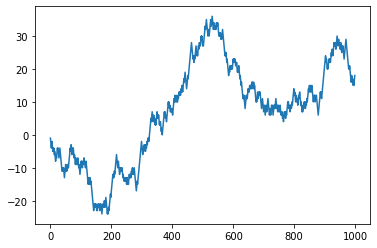

37

In [90]:
## 模拟一次简单的一维随机漫步
import numpy as np
import matplotlib.pyplot as plt

step_num = 1000
draws = np.random.randint(0, 2, size=step_num)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()

plt.plot(walk)
plt.show()

(np.abs(walk) >= 10).argmax() #需要多久才能距离初始点至少10步远
#argmax()返回的是第一个最大值的索引

In [103]:
## 模拟多个一维随机漫步
import numpy as np

step_num = 1000
walk_num = 5000

draws = np.random.randint(0, 2, size=(walk_num, step_num))
steps = np.where(draws > 0, 1, -1)

walks = steps.cumsum(1)

print(walks.max(), walks.min(), '\n')

hits30 = (np.abs(walks) >= 30).any(1)
print(hits30, '\n')
print(hits30.sum(), '\n') #超过30的次数

times = (np.abs(walks[hits30]) >= 30).argmax(1) #在有超过30的次数中操作
print(times.mean(), '\n') #超过30所用时间


119 -134 

[False  True  True ... False  True  True] 

3478 

515.764807360552 

358.766


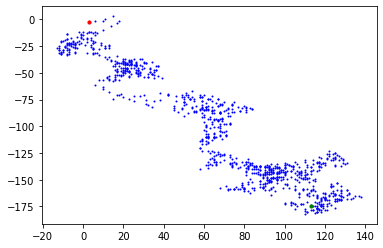

In [27]:
## 模拟一次二维随机漫步
import numpy as np
import matplotlib.pyplot as plt

walk_num = 1000
x_direction = np.random.choice([-1, 1], size=walk_num)
x_distance = np.random.choice(5, size=walk_num)
x_step = x_direction * x_distance
x = np.cumsum(x_step)

y_direction = np.random.choice([-1, 1], size=walk_num)
y_distance = np.random.choice(5, size=walk_num)
y_step = y_direction * y_distance
y = np.cumsum(y_step)

plt.scatter(x, y, c='blue', s=1)
plt.scatter(x[0], y[0], c='red', s=10)
plt.scatter(x[-1], y[-1], c='green', s=10)
plt.show()

In [34]:
## 广播
import numpy as np

# 例1（加法表）
a = np.arange(6).reshape(-1, 1)
b = np.arange(4)
c = a + b
print(a.shape, b.shape, c.shape)  #b.shape补充为(1,4)
print(c, '\n')

# ogrid对象
x, y = np.ogrid[0:5:2, 1:6:2]
print(x, y, '\n')

s, t = np.ogrid[0:5:4j, 0:5:3j]
print(s, t, '\n')

(6, 1) (4,) (6, 4)
[[0 1 2 3]
 [1 2 3 4]
 [2 3 4 5]
 [3 4 5 6]
 [4 5 6 7]
 [5 6 7 8]] 

[[0]
 [2]
 [4]] [[1 3 5]] 

[[0.        ]
 [1.66666667]
 [3.33333333]
 [5.        ]] [[0.  2.5 5. ]] 



In [37]:
## 其他方法
import numpy as np

# reduce
a = np.add.reduce([[1, 2, 3], [4, 5, 6]], axis=1)
print(a, '\n')

# accumulate
b = np.add.accumulate([[1, 2, 3], [4, 5, 6]], axis=1)
print(b, '\n')

# outer
c = np.add.outer([1, 2, 3, 4], [10, 20])
print(c, '\n')

[ 6 15] 

[[ 1  3  6]
 [ 4  9 15]] 

[[11 21]
 [12 22]
 [13 23]
 [14 24]] 

